# House Prediction Dataset
### Objective
- Supervised Learning (Regression problem) by predicting house prices based on features (squart feet, number of floors, etc)


## 1. DATA COLLECTION 
- Collect the data from kaggle with CSV format

## 2. EXPLORATORY DATA ANALYSIS & DATA CLEANING
- Statiscial summary
- Dataset shape
- Datatypes (numerical, categorical)
- Categorical (ordinal and nominal)
- Pearson Correlation
- Pie Charts for features 
- Target values visualization 
- Plot Distribution 

## 3. FEATURE ENGINEERING
- Fill Missing Values 
- Binary Classification Problem 
- If model is tree based method, no scaling is needed 
- If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, etc)
- If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc


## 4. FEATURE SELECTION
- Dropping low variance features 
- Information Gain-Mutual Information in Classification Problems
- Pearson Correlation 
- Fisher Score-ChiSquare Test for Feature Selection
- Tree-based Selection using ExtraTreesClassifier (Feature Importance)
- Univariate Selection 


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from pprint import pprint
import pylab

# Data Collection

In [3]:
df = pd.read_csv('../inputs/train.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EXPLORATORY DATA ANALYSIS & DATA CLEANING
## Statiscial summary
## Dataset shape
## Datatypes (numerical, categorical)
## Categorical (ordinal and nominal)
## Pearson Correlation
## Pie Charts for features 
## Target values visualization 
## Plot Distribution 

In [6]:
print(f'DataFrame has {df.shape[0]} Rows and {df.shape[1]} Columns')

DataFrame has 4600 Rows and 18 Columns


In [7]:
# find number of int, float, and object
# must convert all dataset into numbers or bool values
df.dtypes.value_counts()

int64      9
object     5
float64    4
dtype: int64

In [8]:
features = df.columns
numerical_feat = [features for features in df.columns if df[features].dtypes != 'O']
print(f'Number of Numerical Features: {len(numerical_feat)}')

categorical_feat = [features for features in df.columns if df[features].dtypes == 'O']
print(f'Number of Categorical Features: {len(categorical_feat)}')

Number of Numerical Features: 13
Number of Categorical Features: 5


In [12]:
# collect all dtpyes in 3 classes (object, int, float)
pprint(df.columns.to_series().groupby(df.dtypes).groups)

{dtype('int64'): Index(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object'),
 dtype('float64'): Index(['price', 'bedrooms', 'bathrooms', 'floors'], dtype='object'),
 dtype('O'): Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')}


In [13]:
# statistical summary of object dtypes columns (categorical)
df.describe(include=[np.object])

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


In [14]:
# statistical summary of (numerical) dtypes  
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
# create a pandas dataframe of each features, data-type, percentage of num of null values

df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
datatype,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def plot_distribution(df, feature):
	plt.figure(figsize=(25,6))
	# first row, 1st column
	plt.subplot(1, 3, 1)
	sns.distplot(df[feature])
	# first row, 2nd column
	plt.subplot(1, 3, 2)
	stats.probplot(df[feature], dist='norm', plot=pylab)
 	# first row, 3rd column
	plt.subplot(1, 3, 3)
	plt.boxplot(df[feature], vert=False)
	plt.show()

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


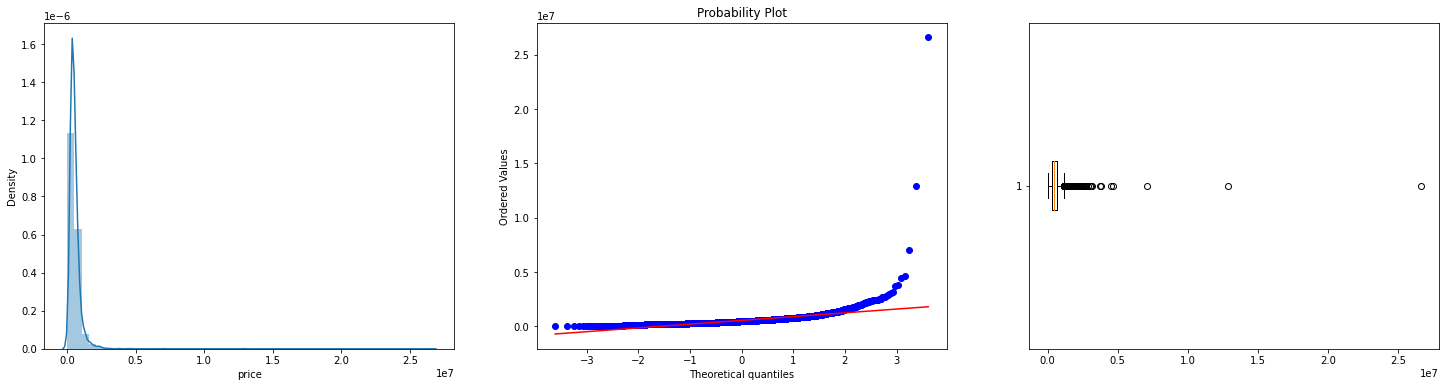

In [25]:
# Explore target values 
plot_distribution(df, 'price')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


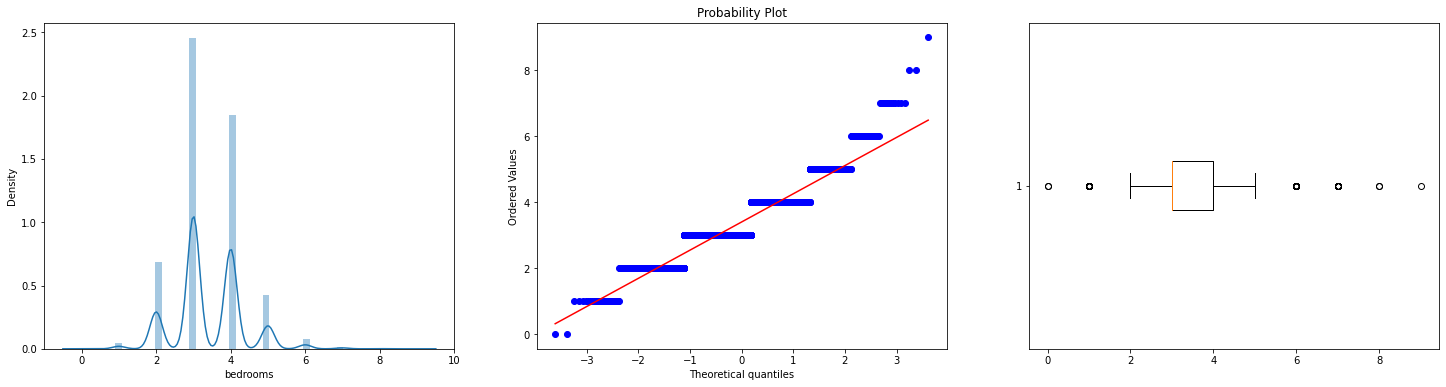

In [27]:
plot_distribution(df, 'bedrooms')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


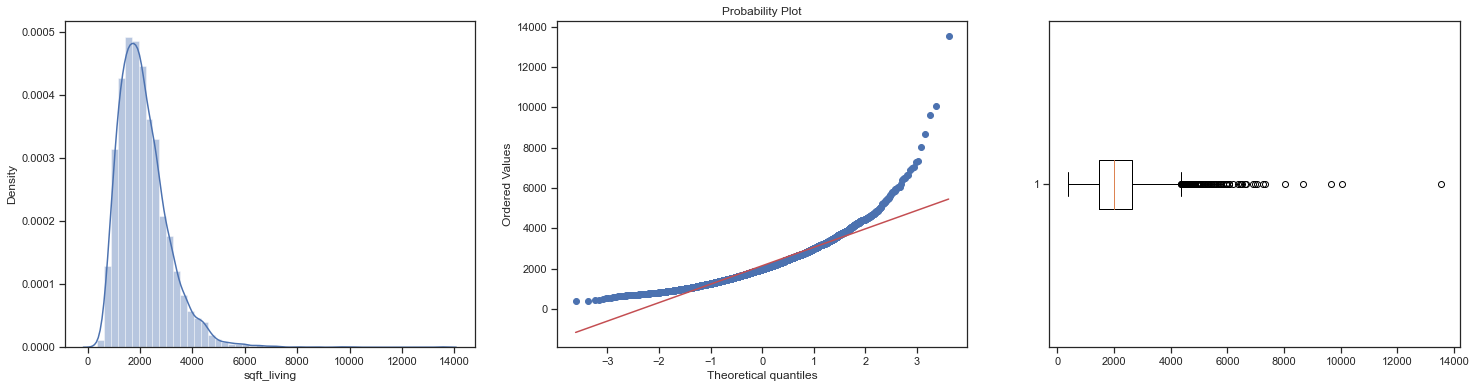

In [66]:
plot_distribution(df, 'sqft_living')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


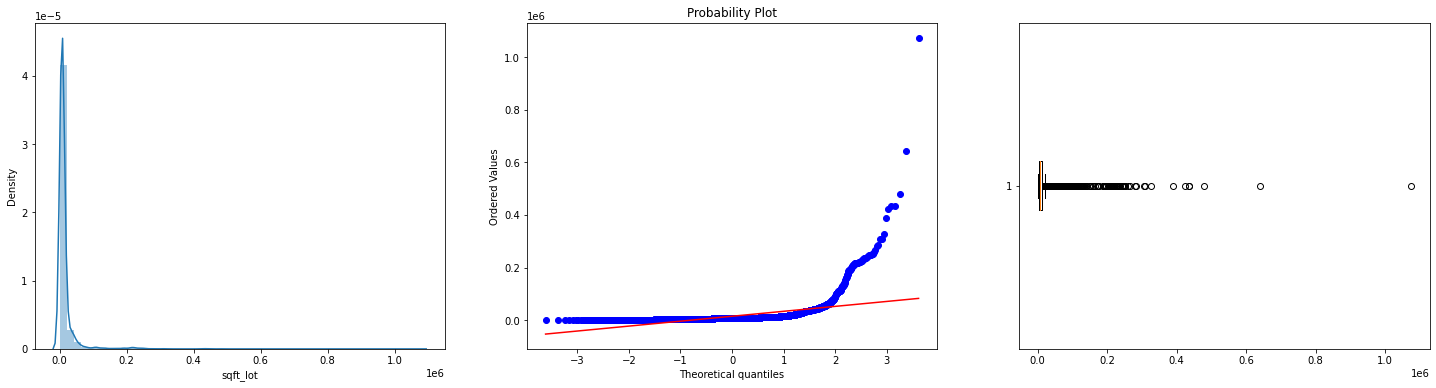

In [33]:
plot_distribution(df, 'sqft_lot')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


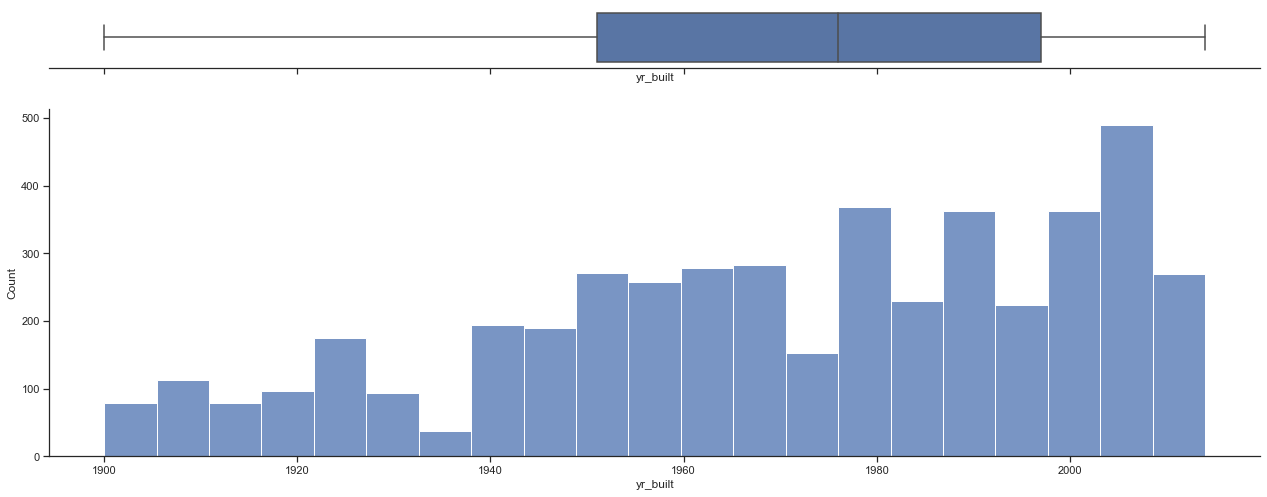

In [63]:
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(21.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.yr_built, ax=ax_box)
sns.histplot(df.yr_built, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


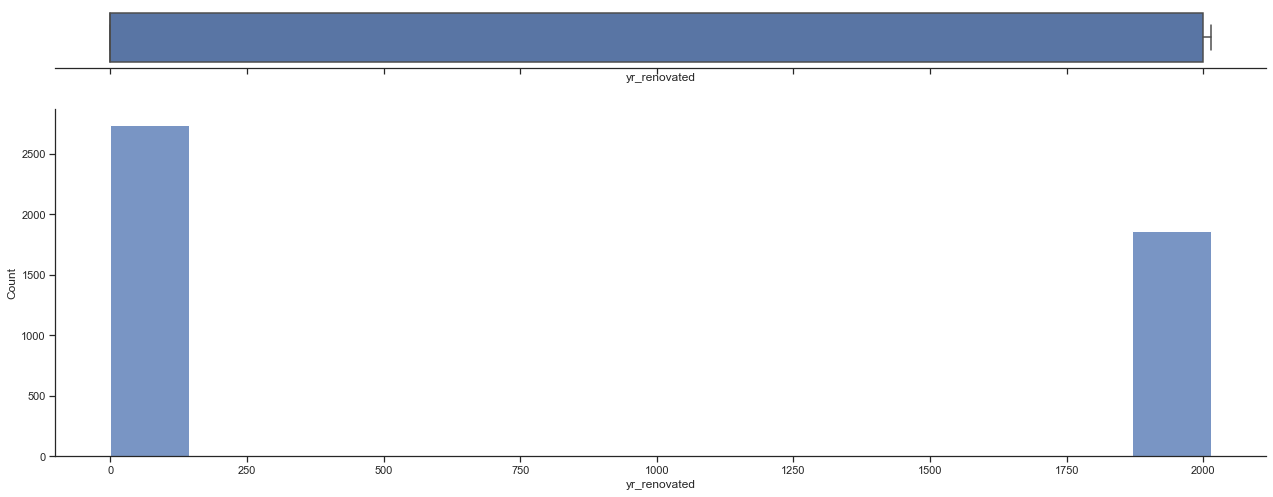

In [64]:
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(21.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.yr_renovated, ax=ax_box)
sns.histplot(df.yr_renovated, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Shoreline'),
  Text(1, 0, 'Seattle'),
  Text(2, 0, 'Kent'),
  Text(3, 0, 'Bellevue'),
  Text(4, 0, 'Redmond'),
  Text(5, 0, 'Maple Valley'),
  Text(6, 0, 'North Bend'),
  Text(7, 0, 'Lake Forest Park'),
  Text(8, 0, 'Sammamish'),
  Text(9, 0, 'Auburn'),
  Text(10, 0, 'Des Moines'),
  Text(11, 0, 'Bothell'),
  Text(12, 0, 'Federal Way'),
  Text(13, 0, 'Kirkland'),
  Text(14, 0, 'Issaquah'),
  Text(15, 0, 'Woodinville'),
  Text(16, 0, 'Normandy Park'),
  Text(17, 0, 'Fall City'),
  Text(18, 0, 'Renton'),
  Text(19, 0, 'Carnation'),
  Text(20, 0, 'Snoqualmie'),
  Text(21, 0, 'Duvall'),
  Text(22, 0, 'Burien'),
  Text(23, 0, 'Covington'),
  Text(24, 0, 'Inglewood-Finn Hill'),
  Text(25, 0, 'Kenmore'),
  Text(26, 0, 'Newcastle'),
  Text(27, 0, 'Mercer Island'),
  Text(28, 0, 'Bl

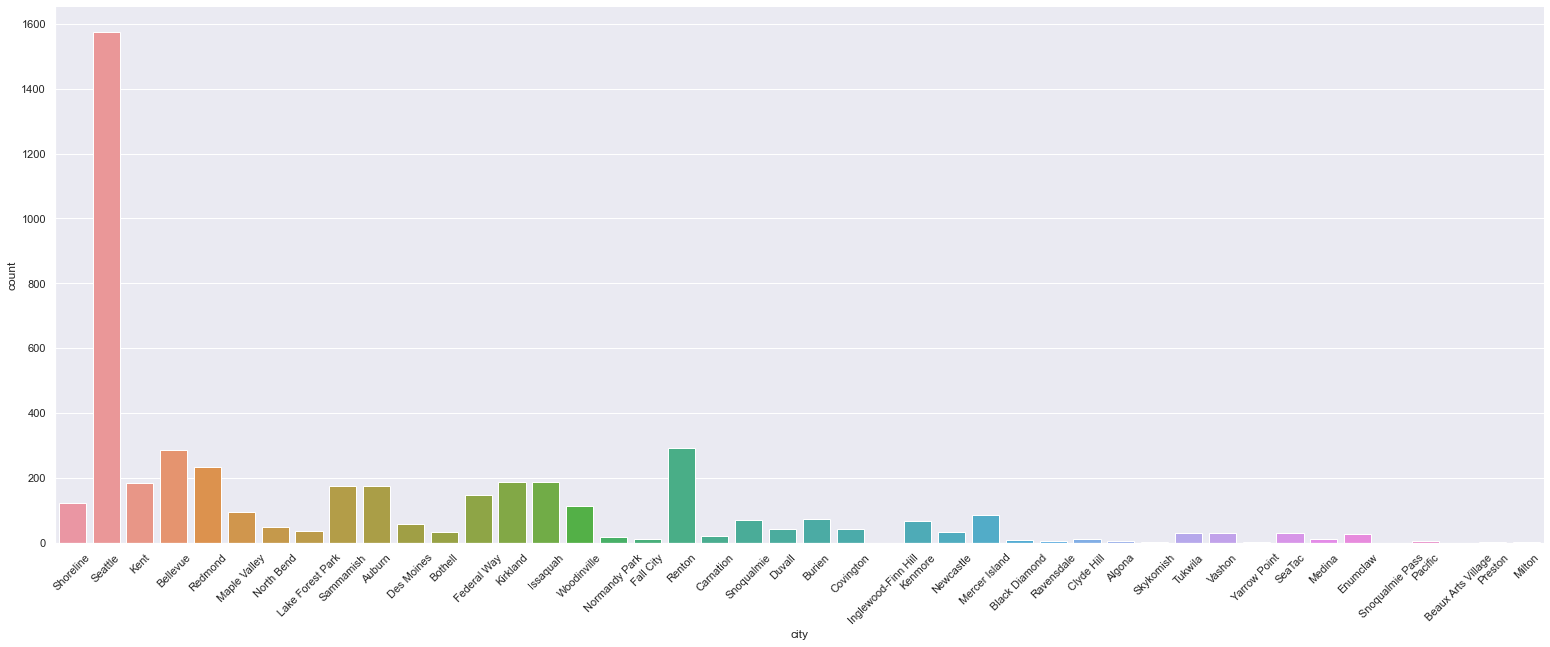

In [61]:
# figure size in inches
sns.catplot(x="city", kind="count", data=df, height=8.27, aspect=21.7/8.27)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


# FEATURE ENGINEERING
## Data Manipulation
## set price as target values 
## If model is tree based method, no scaling is needed 
## If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, KMeans, etc)
## If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc
## One-hot-encode
## Mean encode zip-code


In [67]:
# get the number of years since being built
df.yr_built = 2021 - df.yr_built

In [68]:
# get the number of years since being renovated, if not set to 0
df.yr_renovated = 2021 - df.yr_renovated
df.yr_renovated = np.where(df.yr_renovated > 2020, 0, df.yr_renovated)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


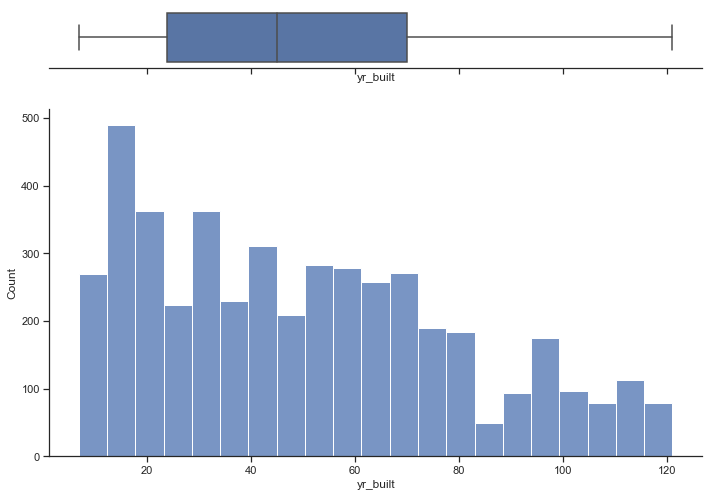

In [69]:

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.yr_built, ax=ax_box)
sns.histplot(df.yr_built, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('../plots/year_built_dist.png')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


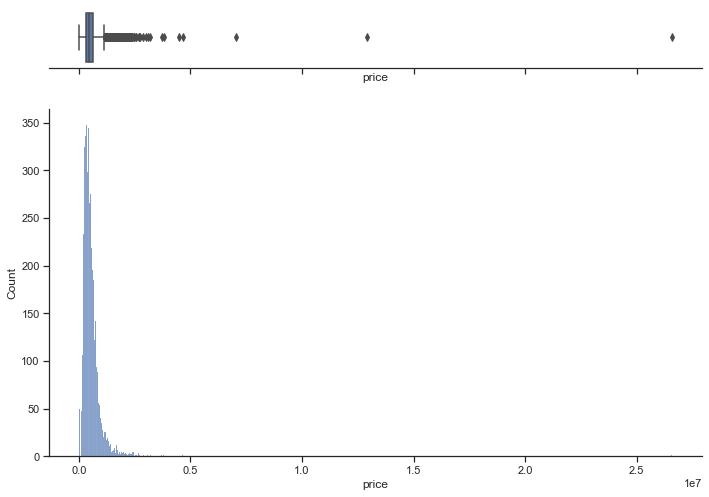

In [10]:

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(11.7, 8.27),
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.price, ax=ax_box)
sns.histplot(df.price, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.savefig('../plots/price_skewed_distribution.png')

In [11]:
# filter out outliers that are greater than 3 std from mean on target values 

outliers = []
def detect_outliers(col):
    mu = np.mean(col)
    std = np.std(col)
    
    for i in col:
        z_score = (i - mu)/ std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
    

outlier_pt=detect_outliers(df.price)
print(df.price.shape)
df = df[~df.price.isin(outlier_pt)]
print(df.shape)

(4600,)
(4566, 15)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


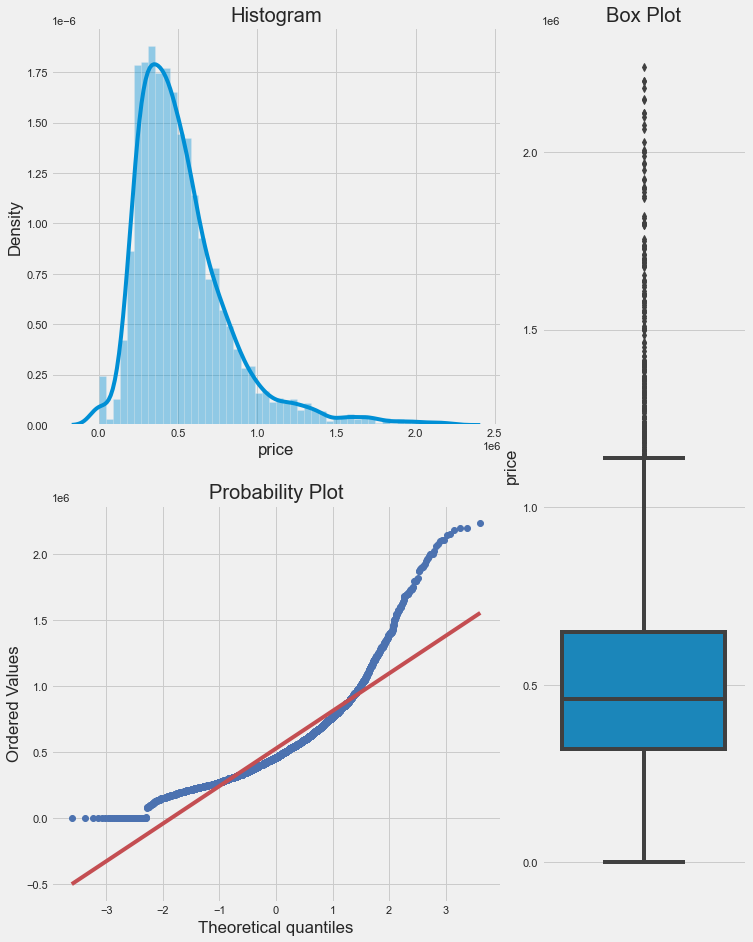

In [12]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,15))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    # sns.boxplot(df.loc[:,feature], orient='v', ax = ax3)
    sns.boxplot(y=df.price, orient='v', ax = ax3)

plotting_3_chart(df, 'price')
plt.savefig('../plots/price_cleaned_distribution.png')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

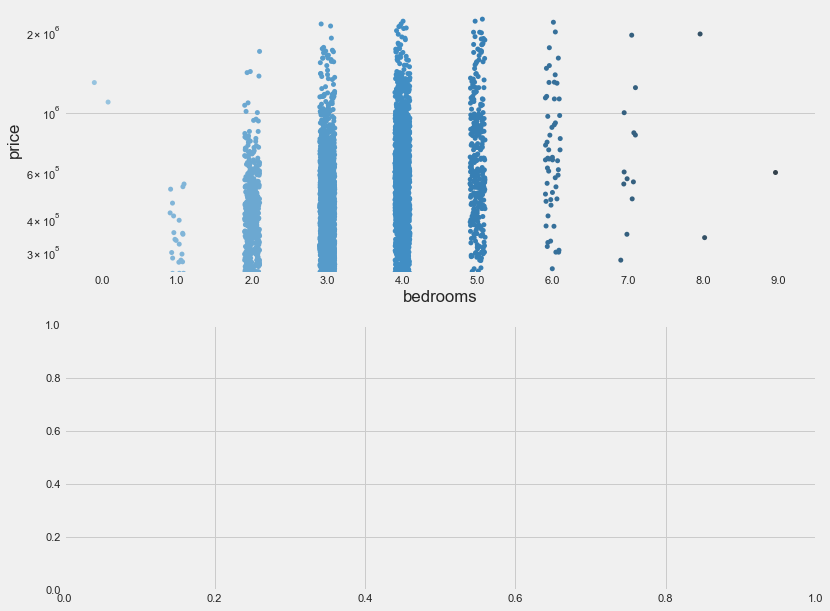

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = df, ax = ax1, jitter=True, palette="Blues_d")

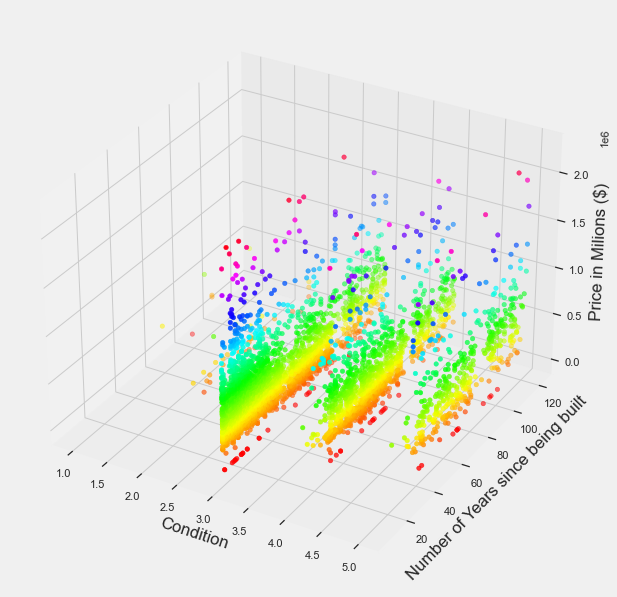

<Figure size 432x288 with 0 Axes>

In [14]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['condition']
y_points = df['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

ax.set_xlabel('Condition')
ax.set_ylabel('Number of Years since being built')
ax.set_zlabel('Price in Milions ($)')
plt.show()
plt.savefig('../plots/price_conditions_yrbuilt.png')

In [9]:
# remove WA from statezip zip column and convert to int64
df.statezip = df.statezip.str.replace(r'\D', '')
df.statezip = pd.to_numeric(df.statezip,errors='coerce')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
from sklearn.feature_selction import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

In [16]:
# get city unique values
print(len(df.city.value_counts()))
# extract the top ten and one hot encode 
top_10 = [x for x in df.city.value_counts().sort_values(ascending=False).head(10).index]
print(top_10)

44
['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way']


In [17]:
df_ohe_city = df.copy()

def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
        
one_hot_top_x(df_ohe_city, 'city', top_10)

df_ohe_city.drop('city', axis=1, inplace=True)

df_ohe_city.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'city_Seattle', 'city_Renton',
       'city_Bellevue', 'city_Redmond', 'city_Issaquah', 'city_Kirkland',
       'city_Kent', 'city_Auburn', 'city_Sammamish', 'city_Federal Way'],
      dtype='object')

In [18]:
df_ohe_city.statezip.value_counts()

98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98039      6
98288      3
98050      2
98354      2
98068      1
Name: statezip, Length: 77, dtype: int64

In [19]:
# feature engineer the zipcode by target encoding 
# getting the mean price (target value) for each zipcode 
city_target_encode = df_ohe_city.groupby(['statezip'])['price'].mean().to_dict()
df_ohe_city['statezip'] =  df_ohe_city['statezip'].map(city_target_encode)


In [20]:
df_target_encode = df.copy()

In [21]:
city_target_encode = df_target_encode.groupby(['city'])['price'].mean().to_dict()
df_target_encode['city'] =  df_target_encode['city'].map(city_target_encode)


city_target_encode = df_target_encode.groupby(['statezip'])['price'].mean().to_dict()
df_target_encode['statezip'] =  df_target_encode['statezip'].map(city_target_encode)

df_target_encode

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,374433.232975
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,320243.968571
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,560166.428571
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,637555.719367
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,595086.468132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,374433.232975
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,639103.418803
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,499455.770108
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,263912.457483


In [22]:
city_target_encode = df.groupby(['city'])['price'].mean().to_dict()
df['city'] =  df['city'].map(city_target_encode)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,98042
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,98008
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,98052
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,98133
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,98007
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,98178


In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,98042
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,98008
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,98052
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,98133
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,98007
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,98178


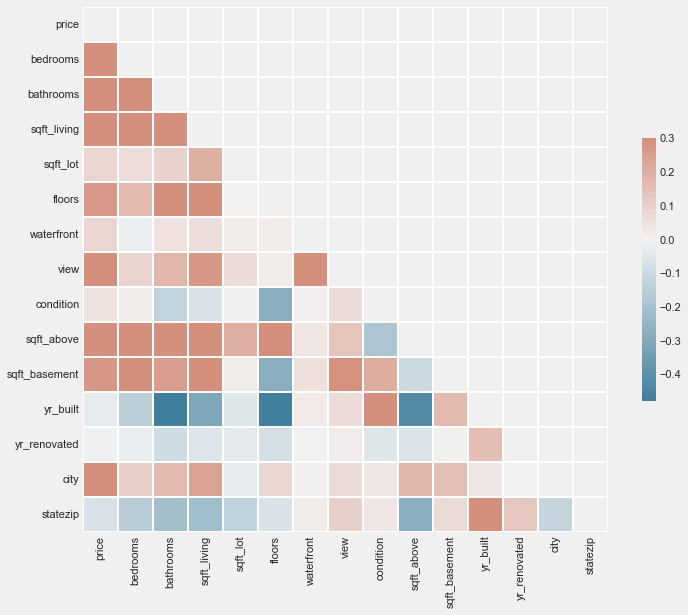

In [24]:
# plt correlation with df with city being traget encoded

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('../plots/train_clean_corr.png')

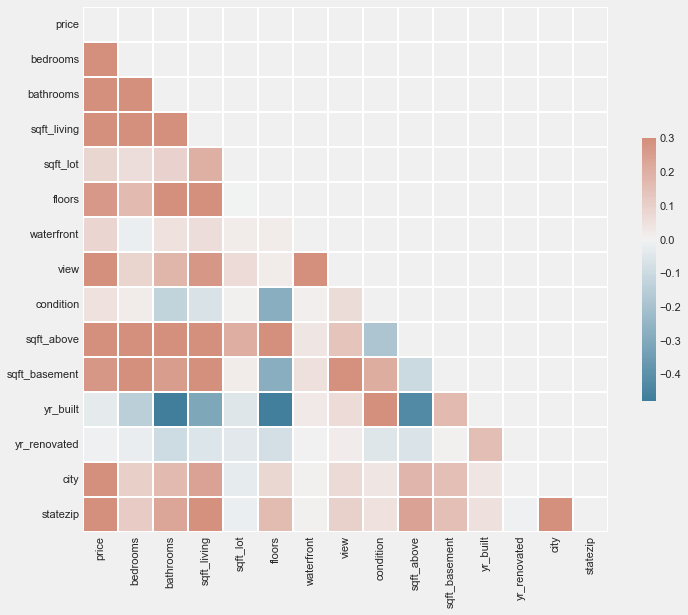

In [25]:

# plt correlation with df with city and zipcode being traget encoded
corr = df_target_encode.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('../plots/train_target_encode_corr.png')


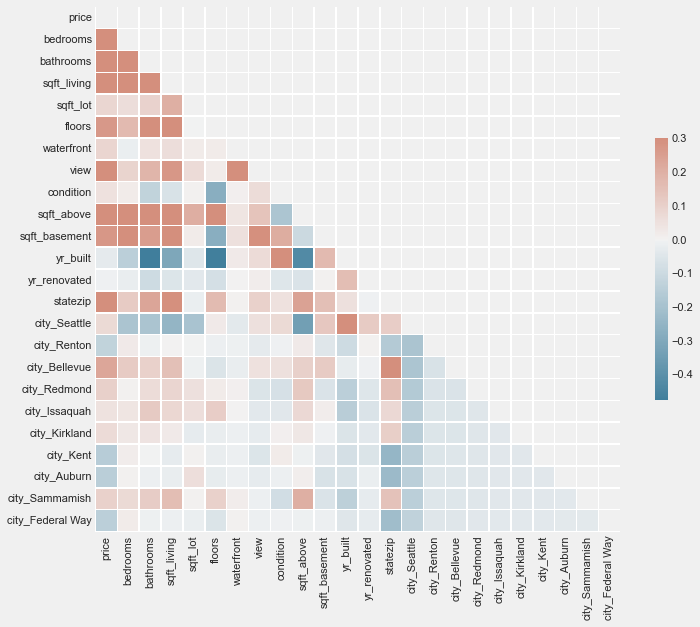

In [26]:

# plot correlation with df with city and zipcode being traget encoded
corr = df_ohe_city.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('../plots/train_ohe.png')



In [27]:
df.to_csv('../inputs/train_clean.csv')
df_ohe_city.to_csv('../inputs/train_ohe.csv')
df_target_encode.to_csv('../inputs/train_target_encode.csv')

# Feature Importance 

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('../inputs/train_clean.csv')
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,66,16,420392.364047,98133
1,2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,55,0,297370.120978,98042
2,3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,58,0,800504.147577,98008
3,4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,45,29,660759.148178,98052
4,5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,83,27,556957.043399,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,67,42,556957.043399,98133
4562,4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,38,12,800504.147577,98007
4563,4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,12,0,377040.966329,98059
4564,4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,47,0,556957.043399,98178


In [10]:
target = df.price
features = df.drop('price', axis=1)

model = ExtraTreesRegressor()
model.fit(features, target)

ExtraTreesRegressor()

In [11]:
model.feature_importances_

array([0.05794993, 0.02589224, 0.05699895, 0.24818827, 0.02639185,
       0.01982788, 0.00842961, 0.05361712, 0.02187113, 0.13102113,
       0.02980681, 0.04308542, 0.02117184, 0.20593948, 0.04980835])

<AxesSubplot:>

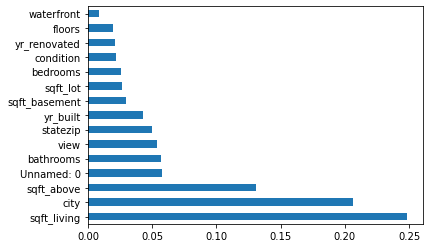

In [13]:
rank_feat = pd.Series(model.feature_importances_, index=features.columns)
rank_feat.nlargest(20).plot(kind='barh')

# Information Gain

In [20]:
from sklearn.feature_selection import mutual_info_regression


In [27]:
mutual_info = mutual_info_regression(features, target)
mutual_df = pd.Series(mutual_info, index=features.columns)
mutual_df.sort_values(ascending=False)


statezip         0.339190
sqft_living      0.329933
city             0.308524
sqft_above       0.234410
bathrooms        0.177224
sqft_lot         0.086866
yr_built         0.069399
bedrooms         0.066986
floors           0.065555
sqft_basement    0.051893
Unnamed: 0       0.048702
view             0.044651
yr_renovated     0.012897
condition        0.004380
waterfront       0.000000
dtype: float64

In [ ]:
pd.Series